# Data Visualization (part 1)

> A picture is worth a thousand words.

In many cases we might want to visualize data instead of just printing results or statistical measures on screen. When wanting to make a presentation, graphs and charts are king. They allow for concise viewing of statistical data, especially when that data involves data sets numbering in the hundreds or more.

We'll split this tutorial into two parts: the first will cover **matplotlib**, a somewhat low-level plotting library; the second will cover **seaborn** a higher level plotting library, which is built on top of matplotlib and can generate more advanced plots easily.

## Matplotlib

This package is useful for plotting 2D graphics. It is probably the most used and best supported plotting package in python.

The module we will be using the most is `matplotlib.pyplot`. This module provides a procedural interface to the matplotlib object-oriented plotting library. It is modeled closely after Matlab. Therefore, the majority of plotting commands in pyplot have Matlab analogs with similar arguments.

### Sample plots

The two most common plots are a **line** plot and a **scatter** plot. Both draw a series of points in a figure; the only difference is that the first type of plot connects the points given to it. 

```python
plt.plot(x, y)     # lineplot
plt.scatter(x, y)  # scatterplot
```

Both types of plots can be drawn with only two arguments: `x`, which is a sequence of the coordinates of the points on the x-axis, and `y`, which is the same thing for the y-axis. 

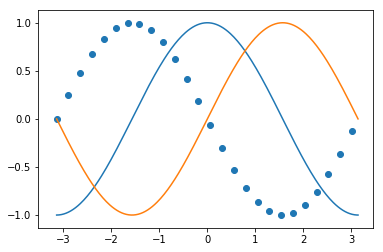

In [1]:
import matplotlib.pyplot as plt  # basic import statement
%matplotlib inline
# this argument is used in the IPython/Jupyter Notebooks.
# It tells is to incorporate the plot in the notebook instead of poping a new window with the plot (which is the default)

# we will need these as well:
import numpy as np
import pandas as pd

x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
# This command returns a numpy.ndarray with 256 values equally distributed in [-pi,pi].
# If endpoint was False the values would be distributed in [-pi,pi).

c, s = np.cos(x), np.sin(x)
# These two commands return the elementwise cos and sin of the array x.

plt.plot(x, c)  # command that creates a line that connects the points given in the argument. used here to plot the cosine
plt.plot(x, s)  # plots the sine in the same plot
plt.scatter(x[::10], s[::-10])  # command that simply draws the points given as arguments. used to create scatterplots
# plt.show()

- If we weren't in the notebook we would also need a `plt.show()` commad at the end.
- If we wanted to save the figure we would use `plt.savefig('plotname.png', dpi=72, bbox_inches='tight')`. Saves the plot in *plotname.png* with 72 dots-per-square-inch. We could also save the figure as a vector image (as a *.pdf*). The `bbox_inches` argument is useful because pyplot leaves a large white box around the image which is often undesirable. 

This is the simplest way to create a figure with matplotlib. In order to be able to customize the figure, we need to delve a bit deeper into matplotlib. 

### Figure anatomy

A few things you must be aware of:

- The whole **figure** is represented as an object called a [`figure`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html). This was done **automatically** in the code above, however if we want to customize aspects like the figure's **size**, **resolution**, **borders**, **background**, etc,  we'll need to create our own. 
- The figure might contain one or more "sub-figures" called **subplots**. Each one is represented as an object called an [`axes`](https://matplotlib.org/api/axes_api.html). Every axes consists of several parts, the most important are:
  - The [`spines`](https://matplotlib.org/api/spines_api.html), which are the *borders* on the edges of a plot.
  - The [`labels`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) for both $x$ and $y$ axes.
  - The [`ticks`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html), which are points denoted on the $x$ and $y$ axes. Each tick has a **position** (i.e. where it is placed along its axis) and a **label** (i.e. what the label of the tick is). There are two types of ticks: **major** and **minor**.
  - The [`title`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html) of the plot.
  - The [`grid`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html).
  - The [`legend`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html).
  - Any other [`artists`](https://matplotlib.org/api/artist_api.html) the plot may contain (e.g. [**lines**](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html), [**markers**](https://matplotlib.org/api/markers_api.html), [**text**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html))
 
All these elements are shown in the image below:

![Figure anatomy](https://matplotlib.org/mpl_examples/showcase/anatomy.png)

### Line plots

We'll gradually build on the two lineplots created above, to customize them as much as possible. 

(-3.0, 3.0)

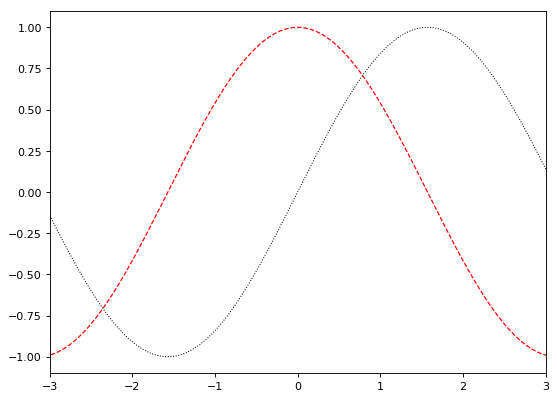

In [2]:
# In order to manually select the size and resolution of the plot, we must define a custom "figure" 
plt.figure(figsize=(8, 6), dpi=80)  # Creates a figure of size 8x6 inches, 80 dots per inch

# We can create our own axes if we like. This is not necessary here 
plt.subplot(1, 1, 1)  # Create a single "subplot". More on how subplots are created, later

plt.plot(x, c, color="red", linewidth=1.1, linestyle="--")   # Plot cosine with a red dashed line of width 1.1
plt.plot(x, s, color="black", linewidth=0.9, linestyle=":")  # Plot sine with a black dotted line of width 0.9

plt.xlim(-3.0, 3.0)  # limits the x-axis from -3 to +3

Lines have many different parameters; the most common of which are:

- `color` or `c`, which specifies the **color** each line will have. You can find all available methods of specifying colors [here](https://matplotlib.org/users/colors.html). 
- `linewidth` or `lw`, a float value specifying the **width** of the line.
- `linestyle` or `ls`, if we want to change the **style** of the line, from a solid one to something else. Available styles can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle).
- `label` is a string that will represent the line if a **legend** is present. 
- `alpha`, a float that regulates **transparency**.
- finally `zorder` controls the order with which the lines are drawn. Lines with a higher `zorder` are drawn last and appear on top of the rest.  

A full list of parameters we can customize in lines can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html).

Furthermore, we can modify the plot by adding a title, axis labels and a legend.

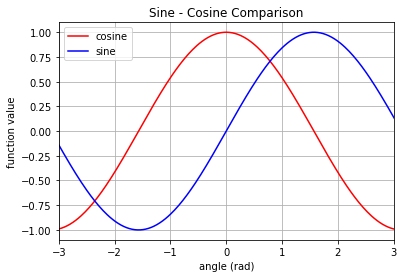

In [3]:
plt.title('Sine - Cosine Comparison')  # adds a title to the plot

plt.xlabel('angle (rad)')  # x axis labels
plt.ylabel('function value')  # y axis labels

plt.grid()  # adds a grid to the plot

plt.xlim(-3.0, 3.0)  # set the limits again

# add a legend
plt.plot(x, c, color="r", label='cosine')
plt.plot(x, s, color="b", label='sine')
plt.legend(['cosine', 'sine'], loc=0)  # loc=0 means 'place it where you think it's best'
# we also modified the lines again to default width/style

We can even **annotate** some points of interest in the figure!

The points we want to annotate are $cos(\frac{2\pi}{3})$ and $sin(-\frac{2\pi}{3})$.

We will use the [`plt.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) and the [`plt.annotate`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html) arguments for that.

```python
plt.annotate(text, xy, xytext, arrowprops)
```
- **text** is the text of the annotation.
- **xy** indicates the coordinates we want annotated.
- **xytext** are the coordinates of the text.
- **arrowprops** are the properties of the annotation arrow.

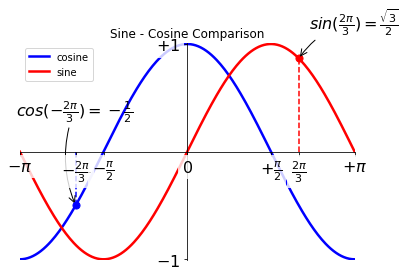

In [4]:
# First we'll plot our two trigonometric functions
plt.title('Sine - Cosine Comparison')
plt.xlim(-3.0, 3.0)
plt.ylim(-1.01, 1.01)
plt.plot(x, c, color="b", linewidth=2.5, label='cosine', zorder=-1)
plt.plot(x, s, color="r", linewidth=2.5, label='sine', zorder=-1)
plt.legend(['cosine', 'sine'], loc=0)

# Customize the axes, by removing surrounding barrier and ticks and ordering them last
ax = plt.gca()  # Get current axes object
ax.spines['right'].set_color('none')  # Remove top spine. Could be done with ax.spines['right'].set_visible(False)
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0)) # Place the spine at the coordinate '0' of the data
ax.spines['bottom'].set_zorder(-1)
ax.yaxis.set_ticks_position('left')  # Set ticks to the left side of the y-axis
ax.spines['left'].set_position(('data', 0))
ax.spines['left'].set_zorder(-1)

# Then we take care of the annotations

# Define the points we want annotated on the x-axis
p1 = 2 * np.pi / 3  # point 1
p2 = -p1  # point 2

# Customize the axes ticks
# ticks accept two arguments: a sequence of the positions of the ticks and a sequence of the labels of the ticks
plt.xticks([-np.pi, p2, -np.pi/2, 0, np.pi/2, p1, np.pi],
           [r'$-\pi$', r'$-\frac{2\pi}{3}$', r'$-\frac{\pi}{2}$', r'$0$',  # note the latex math notation
            r'$+\frac{\pi}{2}$', r'$\frac{2\pi}{3}$', r'$+\pi$'])
plt.yticks([-1, +1],[r'$-1$', r'$+1$'])

# Plot those points individually
plt.scatter([p1,], [np.sin(p1),], s=50, c='r', edgecolor='r')  # add point 1 to the plot with color blue
plt.scatter([p2,], [np.cos(p2),], s=50, c='b', edgecolor='b')  # add point 2 to the plot with color red

# Plot a dotted line that shows the point's projection on the x-axis
plt.plot([p1, p1], [0, np.sin(p1)], color='r', linewidth=1.5, linestyle="--")  # add a blue dotted line to point 1
plt.plot([p2, p2], [0, np.cos(p2)], color='b', linewidth=1.5, linestyle="--", zorder=-1)  # add a red dotted line to point 2

# Plot the annotations
plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',  # we're using a latex math formula as the annotation
             xy=(p1, np.sin(p1)), xycoords='data',  # xy are the coords of the point being annotated,
             # xycoords='data' sets the coordinate system of xy to be the same as the one being used for the data
             xytext=(+10, +30), textcoords='offset points', fontsize=16,  # likewise xytext sets the coords for the text
             # textcoords='offset points' sets the coordinate system as offset from the point (+10, +30) means that the
             # text should begin 10 points to the right and 30 points on top of the point being annotated
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
             # arrowprops takes a dictionary of the properties of the arrow
plt.annotate(r'$cos(-\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(p2, np.cos(p2)), xycoords='data',
             xytext=(-60, +90), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
             zorder=-1)

# Add a semi-transparrent white box around the ticks, to make them better visible
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 ))

We won't cover all of the customizations made above; it was meant mostly to showcase some of the capabilities of matplotlib plots.

### Scatter plots

Let's now discuss most important parameters with which we can customize scatterplots:

- `c`, which specifies the **color** each marker will have. The same [colors](https://matplotlib.org/users/colors.html) are available for markers as were for lines. Another option we have is coloring **each point with a different color**. This can be accomplished by providing a sequence (with the same length as the number of points) of valid colors to this parameter. One final option we have is passing a sequence of floats; in this case each marker gets assigned a color from a **colormap**. More on this later.   
- `s` is a number denoting the **size** of the markers. Like with colors, we also have the option of selecting a different size for each marker
- `marker` designates the type of the markers to be scattered. A list of valid markers can be found [here](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers).
- `alpha`, like before, regulates **transparency**.
- `linewidths` and `edgecolors` control the markers' edges. `edgecolors` can either be set to `'face'` (the same color as the marker), `'none'` (no line at all) or a valid matplotlib color. 
- Finally `vmin`, `vmax` and `cmap` can be used if we want to pass a sequence of floats as the colors (`c`) of the markers. We'll examine this in an example later.

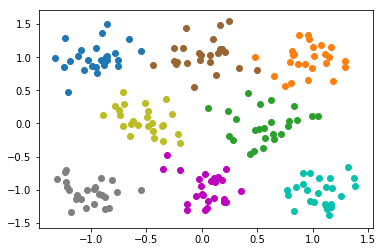

In [5]:
# First, we'll generate eight groups of random points

# (x,y) values of group 1
x1 = np.random.normal(-1, 0.2, 25)
y1 = np.random.normal(1, 0.2, 25)

# (x,y) values of group 2
x2 = np.random.normal(0, 0.2, 25)
y2 = np.random.normal(1, 0.2, 25)

# (x,y) values of group 3
x3 = np.random.normal(1, 0.2, 25)
y3 = np.random.normal(1, 0.2, 25)

# (x,y) values of group 4
x4 = np.random.normal(-1, 0.2, 25)
y4 = np.random.normal(-1, 0.2, 25)

# (x,y) values of group 5
x5 = np.random.normal(0, 0.2, 25)
y5 = np.random.normal(-1, 0.2, 25)

# (x,y) values of group 6
x6 = np.random.normal(1, 0.2, 25) 
y6 = np.random.normal(-1, 0.2, 25)

# (x,y) values of group 7
x7 = np.random.normal(-0.5, 0.2, 25)
y7 = np.random.normal(0, 0.2, 25)

# (x,y) values of group 8
x8 = np.random.normal(0.5, 0.2, 25)
y8 = np.random.normal(0, 0.2, 25)

# Now, we'll plot them on a scatterplot, using a separate color scheme for each:
plt.scatter(x1, y1)                      # (no 'c' parameter) matplotlib default color
plt.scatter(x2, y2, c=(0.6, 0.4, 0.2))   # a tuple of RGB float values 
plt.scatter(x3, y3, c='#ff7f0e')         # an RGB hex string
plt.scatter(x4, y4, c='0.5')             # a string of a float designating gray level
plt.scatter(x5, y5, c='m')               # one of the default colors m -> magenta
plt.scatter(x6, y6, c='xkcd:turquoise')  # name from the xkcd color survay
plt.scatter(x7, y7, c='C8')              # 9th color (count starts from 0) from a 'CN' color spec
plt.scatter(x8, y8, c='tab:green')       # one of Tableau's default colors

As stated previously, we can select a different color for each point by passing a sequence of colors to the `c` parameter. We'll also try making each of the markers have a different size.

List of colors:
 ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C0', 'C1', 'C2', 'C3', 'C4']


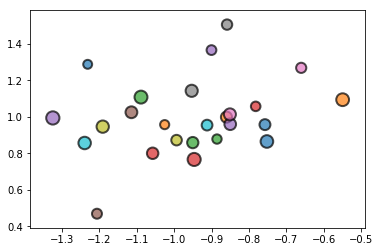

In [6]:
# Create a list of 25 different colors
colors = ['C' + str(x) for x in range(10)] * 2
colors += colors[:5]
print('List of colors:\n', colors)

assert len(x1) == len(colors)  # sequence colors NEEDS to have the same length as the number of points

# Sequence of sizes
sizes = range(80, 181, 4)

# Draw the points with the desired colors and sizes, while being semi-transparent and having thick black edges
plt.scatter(x1, y1, c=colors, s=sizes, edgecolors='black', linewidths=2, alpha=0.7)  # alpha=0 -> fully transparent
                                                                                     # alpha=1 -> fully visible

The third way of coloring markers involves a **colormap** (a continuous sprectrum of colors).

![colormap](https://i.imgur.com/jf3XrXv.png)

To use this we need to pass a **sequence of floats** to the parameter `c`. Each float specifies the color that will be drawn from the colormap. Two parameters (`vmin` and `vmax`) control what numbers will correspond to the edges of the colormap, while the colormap itself can be specified through the `cmap` parameter. A list of available colormaps in matplotlib can be found [here](https://matplotlib.org/examples/color/colormaps_reference.html), while a discussion on their properties can be found [here](https://matplotlib.org/users/colormaps.html).

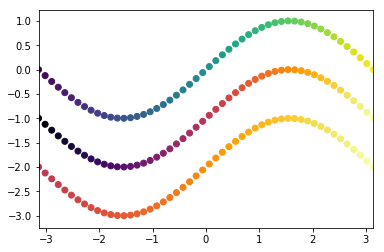

In [7]:
# Create an array of floats from 0 to 1 to be passed to the parameter 'c'
colors = np.linspace(0, 1, len(x[::5]))

# Limit the x-axis to the range [-pi, +pi]
plt.xlim([-np.pi, np.pi])

# Draw the plots
plt.scatter(x[::5], s[::5], c=colors)  # The first plot is using the default colormap (i.e. 'viridis')
                                       # When not vmin/vmax values are not specified, matplotlib uses the min/max
                                       # values from the sequence to so that the whole spectrum is represented
plt.scatter(x[::5], s[::5]-1, c=colors, cmap='inferno')  # Change colormap to 'inferno'
plt.scatter(x[::5], s[::5]-2, c=colors, cmap='inferno', vmin=-1, vmax=1)  # Assign vmin/vmax so that the points draw
                                                                          # colors from only half of the colormap

### Subplots and axes objects

Subplots are a way of putting more than one figures in the same plot. Imagine it as a grid (or an array) of graphs. In order to create a subplot we need to specify three things:

- The number of **rows**, or how many subplots we want to split the image to on the vertical axis.
- The number of **columns**, or the number of subplots on the vertical axis.
- The **index** of the current subplot.

These can be either given as a 3-digit number or 3 single digit arguments.

```python
ax = plt.subplot(234)      # these two are 
ax = plt.subplot(2, 3, 4)  # the same thing
```

The above would create a grid of 2-by-3 and place the subplot in the 4th spot:

$$
\left( \begin{array}{ccc}
1 & 2 & 3 \\
\mathbf{4} & 5 & 6 \end{array} \right)
$$

Some examples:

```python
subplot(111)  # means the subplot covers the whole figure

# we split the figure in two (horizontally):
subplot(121)  # left subplot
subplot(122)  # right subplot

# again, we split it in two (vertically):
subplot(211)  # top subplot
subplot(212)  # bottom subplot

# now, we split it in four:
subplot(221)  # top left subplot
subplot(222)  # top right subplot
subplot(223)  # bottom left subplot 
subplot(224)  # bottom right subplot
```

The `subplot` function is a conveinent way to create an **axes** object. Even when we have just 1 subplot in our figure we might want to use `subplot(111)` just to gain access to the axes.

Previously, in the final example of line plots, when we needed access to the axes object, we used the `plt.gca()` command.

Through the axes object we can customize the plot in more ways. As we saw previously, all elements in a plot (spines, title, labels, lines, markers, etc.) fall under this object. The way we access these elements, however, slightly changes from what we've seen before. Namely, axes elements are accessed through *getters* and *setters*.

For instance, to change the title of an axes object we have to use the method `axes.set_title('new plot title')`. To draw something on a spesific axes we can use the same syntax as before: `axes.plot(x, y)`.

A list of the full functionality of the axes object can be found [here](https://matplotlib.org/api/axes_api.html); it is a lot (most of pyplot's functionality falls under this object)!

The first thing we'll do is to create a single subplot with several of the customizations we saw before, just to see how it's done with the axes object.

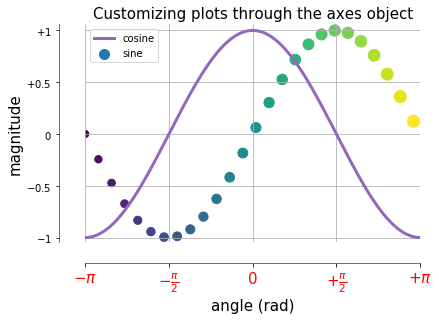

In [8]:
# Create a single subplot to access the axes object
ax = plt.subplot(111)  

# Draw a line plot and a scatter plot on the axes
ax.plot(x, c, c='C4', lw=3, label='cosine')
ax.scatter(x[::10], s[::10], s=range(50, len(s[::10])*4+50, 4),  # incrementing sizes
           c=np.linspace(0, 1, len(s[::10])), label='sine')      # changing colors

# Customize x and y-axis limits
ax.set_xlim([-np.pi, np.pi])  # notice the setters
ax.set_ylim([-1.04, 1.06])

# Create a title and labels for the x and y axes
ax.set_xlabel('angle (rad)', size=15)  # larger fontsize for the text 
ax.set_ylabel('magnitude', size=15)
ax.set_title('Customizing plots through the axes object', size=15)

# Customize the x and y-axis ticks and their labels
# We have to do this in two steps now, separately for the ticks and the labels
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])  # set the x-axis ticks
ax.set_xticklabels([r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$+\frac{\pi}{2}$', r'$+\pi$'],
                   size=15)  # set the labels for the x-axis ticks
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$+0.5$', r'$+1$'], size=15)  # the size increase we try to do here
                                                                               # will have no effect, due to the 
                                                                               # displacement of the spine

# Create a visible grid and a legend (syntax here is the same as before) 
ax.grid()
ax.legend()

# Customize spines
ax.spines['top'].set_visible(False)                   # remove the top spine
ax.spines['right'].set_visible(False)                 # remove the right spine
ax.spines['left'].set_color('red')                    # change color of the left spine 
ax.spines['left'].set_position(('data', -np.pi-0.5))  # move the left spine further left
                                                      # this line actually overwrites the inccreased fontsize of 
                                                      # the y-axis (I'm not sure if this is intentional or a bug)
ax.spines['bottom'].set_color('red')                  # change the color of the bottom spine
ax.spines['bottom'].set_position(('data', -1.25))     # move the bottom spine further down

# To actually change the size of the ticks we need to do it to each one individually!
for tick in ax.xaxis.get_ticklabels():  # get the handle for the x-axis tick labels
    tick.set_fontsize(15)               # change font size to 15
    tick.set_color('red')               # change color to red
    tick.set_weight('bold')             # make the labels bold

Two things to note from above:
1. As mentioned in the comments, the y-axis tick labels size change got overwritten when moving the spine to the left. As for the x-axis we had to manually change each tick.
2. Notice that while the x-axis tick labels changed color, the actual ticks remained black. This is because they are a different object than the tick labels. If we wanted to change them too:

```python
for tick in ax.xaxis.get_ticklines():
      tick.set_color('red')
```

Matplotlib provides with an easier way to change the parameters of the ticks, as well as their labels and the grid, without having to go through each one of them individually: [`axes.tick_params`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html). As an example, to change labels and ticks on both axes to red and make the fonsize of the labels larger:

```python
ax.tick_params(axis='both',   # both x and y axes
               which='both',  # both major and minor ticks
               colors='red',  # change the tick and label colors to red
               labelsize=15)  # change the fontsize
```

Playing around with the elements in a plot is a good way to familiarize yourself with the anatomy of the figure and the elements in each of the objects.

Let's now see how we can create multiple subplots.

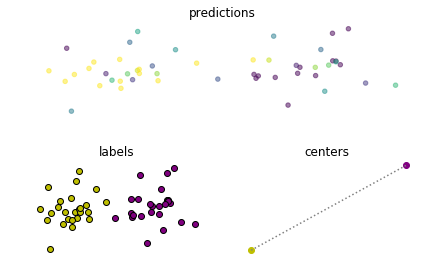

In [9]:
# Create 3 subplots
ax1 = plt.subplot(211)  # we have one subplot in the first row
ax2 = plt.subplot(223)  # and two in the second row
ax3 = plt.subplot(224)

# First subplot: Scatter two groups with colors from a colormap. Each group will have half of the colormap
ax1.scatter(x1, y1, c=np.linspace(-1, 1, len(x1)), vmin=-1, vmax=0, s=20, alpha=0.5)
ax1.scatter(x2, y2, c=np.linspace(-1, 1, len(x2)), vmin=0, vmax=1, s=20, alpha=0.5)
ax1.axis('off')  # this is a neat way of completely removing the axis (spines, ticks, labels, etc.) from a subplot
ax1.set_title('predictions')

# Second subplot: Scatter same groups but with constant colors
ax2.scatter(x1,  y1, c='y', edgecolor='black')
ax2.scatter(x2, y2, c='purple', edgecolor='black')
ax2.axis('off')
ax2.set_title('labels')

# Third subplot: Scatter the centers of each group and draw a line between them
x1m = sum(x1)/len(x1)
y1m = sum(x1)/len(x1)
x2m = sum(x2)/len(x2)
y2m = sum(y2)/len(y2)

ax3.scatter([x1m,], [y1m,], c='y')
ax3.scatter([x2m,], [y2m,], c='purple')
ax3.plot([x1m, x2m], [y1m, y2m], ls=':', c='0.5')  # draw dashed line from the first center to the second
ax3.axis('off')
ax3.set_title('centers')

plt.tight_layout()

A couple things to comment on the figure above:
1. The `axes.axis('off')` command is an easy way of **removing the axis** from a subplot. This however might have the undesired effect of removing all elements belonging to it. Namely, the spines, the ticks, the tick labels and the axis labels. If you want to have some of these elements to be visible, the `axes.axis('off')` command isn't very useful.
2. The final command `plt.tight_layout()` is an **very convenient** way of ensuring that elements of one subplot don't fall onto another (e.g. the x-axis lavel of a subplot falling on the title of the subplot below it).  `plt.tight_layout()` makes sure each element has the appropriate space. A guide on how to use the tight layout can be found [here](https://matplotlib.org/users/tight_layout_guide.html).

There is a secondary syntax to create subplots in matplotlib (i.e. [plt.subplots(rows, cols)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)):

```python
fig, ax = plt.subplots(2, 3)  # creates 6 subplots in a 2-by-3 grid
                              # fig is the handle of the plot's figure
                              # ax is an array containing the 6 axes
```

This created an array of 6 subplots aranged like below: 

$$
\left( \begin{array}{ccc}
1 & 2 & 3 \\
\mathbf{4} & 5 & 6 \end{array} \right)
$$

With this syntax we have an actual array (like the one above) with the `axes` objects of the corresponding subplot. To draw on the 4th (bottom left) subplot: 

```python
ax[1, 0].plot(x, y)  # draw on the first subplot of the second row
```

(-3.4557519189487724,
 3.4557519189487724,
 -1.0999791300835995,
 1.0999791300835995)

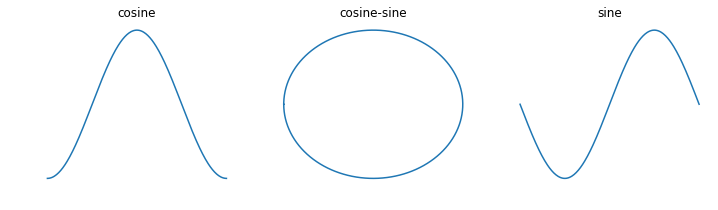

In [10]:
# Create 3 subplots one next to the other
fig, ax = plt.subplots(1, 3, figsize=(12, 3))  # because we are also creating the figure, we can use its parameters

ax[0].plot(x, c)  # only one index because we have just 1 row (see parameter 'squeeze' in plt.subplots)
ax[0].set_title('cosine')
ax[0].axis('off')
ax[1].plot(c, s)
ax[1].set_title('cosine-sine')
ax[1].axis('off')
ax[2].plot(x, s)
ax[2].set_title('sine')
ax[2].axis('off')

### Bar plots

Barplots are a way of visualizing the relationship of a **categorical** variable with a **continuous** one. Barplots can be drawn through [`plt.bar`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html). There are two main parameters to create a bar plot:

- A sequence of the categories we want to plot or their desired positions (`x`).
- The height of each bar (`height`).

```python
plt.bar(x, height)
```

Other parameters include:

- `bottom` chooses the height from which the bars start. Used for stacked barplots.
- `width` regulates the *width* of the bars.
- `align` allows us to select the *alignment* of the bars. Default is `'center'`; align left with `'edge'`; align right with the same, but by passing a negative `width`. 
- `color`, `edgecolor`, `linewidth` all have a similar behavior to what we saw previously.

If we want a horizontal barplot use [`plt.barh`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh) instead.

<BarContainer object of 4 artists>

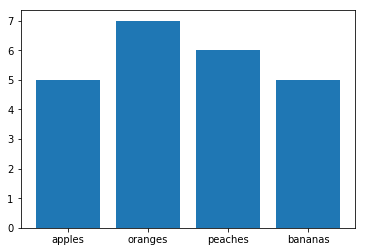

In [11]:
categories = ['apples', 'oranges', 'peaches', 'bananas']
heights = [5, 7, 6, 5]

plt.bar(categories, heights)

Barplots can also be drawn on an `axes` object.

An example would be having a list containing lots of the fruits above and wanting to plot their frequencies in a barplot.

Text(0,0.5,'Frequency (%)')

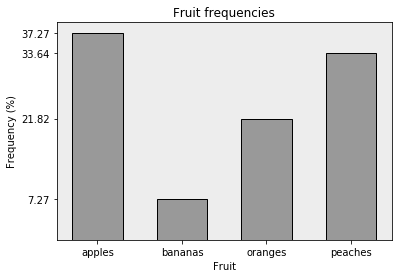

In [12]:
np.random.seed(13)

# Data to draw from
data = ['apples']  * np.random.randint(100) + ['oranges'] * np.random.randint(100) + \
       ['peaches'] * np.random.randint(100) + ['bananas'] * np.random.randint(100)

# Find unique categories and their total number of counts
categories, heights = np.unique(data, return_counts=True)

# Create an axes object
ax = plt.subplot(111)

# Draw the bar plot
ax.bar(categories, heights * 100 / heights.sum(), color='0.6', width=0.6, edgecolor='black')

# Tint the background gray
ax.set_facecolor('0.93')

# Set custom ticks on the y-axis
ax.set_yticks(sorted(heights * 100 / heights.sum()))

# Set a title and axis labels
ax.set_title('Fruit frequencies')
ax.set_xlabel('Fruit')
ax.set_ylabel('Frequency (%)')

### Pie charts

>**Warning!** Before using a pie chart make sure it is really necessary. Even though pie charts are one of the most popular plots, most times the information that they convay is better described in a barplot. The limitations of pie charts are discussed [here](https://www.businessinsider.com.au/pie-charts-are-the-worst-2013-6#buSPkKhseDbRJ90s.99).

>Pie charts aren't meant to be used to compare categories amongst each other, but to visualize what percentage each category occupies of the whole population. For instance, in the previous example, if you want to see how many apples there are compared to peaches you should use a barplot; if you want to illustrate the percentage of apples compared to the whole set of fruits, use a pie chart. Other examples include visualizing market shares, election/poll results, etc.   

Matplotlib supports pie charts through [plt.pie](https://matplotlib.org/1.2.1/api/pyplot_api.html?highlight=pie#matplotlib.pyplot.pie). They can be drawn with only one argument, a list containing the **size** of each slice. 

```python
plt.pie(sizes)
```

Other parameters include:

- `labels` accepts a sequence of classes and adds them as *labels* next to each slice.  
- `explode` parameter can *detatch* one or more slices from the pie.
- `shadow` draws a shadow if set to `True`.
- `startangle` offsets the starting point of the pie chart by the specified angle.
- `autopct` is used to label the slices by the percentage of each. It is drawn on the inside of each slice. If the argument is a format string, the label will be `'fmt%pct'`.

In matplotlib the piechart slices are objects called [**wedges**](https://matplotlib.org/api/_as_gen/matplotlib.patches.Wedge.html).

One thing we might want to do when drawing pie charts in matplotlib is to make the unit length of both axes equal. This will cause the pie chart to be a **perfect circle**. This can be done through [`axes.axis('equal')`](https://matplotlib.org/gallery/subplots_axes_and_figures/axis_equal_demo.html).

(-1.120336493112345,
 1.1009684131211968,
 -1.1035036063812522,
 1.1201713704546403)

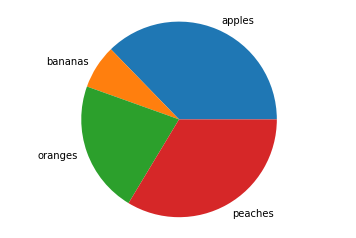

In [13]:
ax = plt.subplot(111)
ax.pie(heights, labels=categories)  # pie charts can also be drawn from axes objects
ax.axis('equal')  # make the axes have an equal aspect ratio

We can customize this chart quite a lot. We'll try to remove the labels in favor of a legend, change the colors so that they aren't as *aggressive*, add the percentage of each category inside each wedge and detatch the "apples" category from the rest of the chart to make it stick out more.

(-1.1503035893830678,
 1.10411455178035,
 -1.1289515688417056,
 1.1538898024620374)

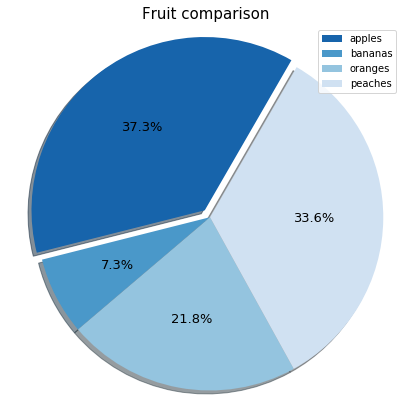

In [14]:
import matplotlib

# Select wedge colors from colormap
cmap = matplotlib.cm.get_cmap('Blues')
colors = [cmap(x) for x in (0.8, 0.6, 0.4, 0.2)]  # Colors from colormaps isolated by calling
                                                  # them from the colormap like a function

# Select which wedge we want to 'explode' from the pie chart
explode = (0.05, 0, 0, 0)  # Only explode the first wedge by a small percentage 

# Enlarge the figure
plt.figure(figsize=(7, 7))

# Create an axes object
ax = plt.subplot(111)

# Draw the pie chart using the desired parameters
wedges, labels, texts = ax.pie(heights, colors=colors, explode=explode,
                               autopct='%1.1f%%', shadow=True, startangle=60) 
# Note that this time we need the wedges and the texts inside them so that we can customize them further

# Increase the fontsize of each text 
for text in texts:
    text.set_size(13)
    # Here we could customize the text a bit more if we wanted:
    # text.set_color(new_color)
    # text.set_weight('bold')


# Add a title
ax.set_title('Fruit comparison', size=15)

# Manually add legend by passing the wedges and their corresponding labels
ax.legend(wedges, categories)

# Set axis aspect ratio to 'equal'
ax.axis('equal')

### Other useful functions

Here we'll see a few more matplotlib functions that can be of use:

#### Text

We can add a text box to arbitrary locations in a plot through [`plt.text`](https://matplotlib.org/api/text_api.html).

```python
plt.text(x, y, text)
```

Two parameters are actually necessary here: 

- the coordinates where the string should be placed, `x` and `y` and
- the actual string, `text`.
  
Optional parameters include:

- the color of the text, `color`
- the background color of the text box, `backgroundcolor`
- `alpha`, which regulates transparency
- `rotation` is used to rotate the tect 

#### Arrow

Arrows are types of patches that can be placed in figures. They can be created through 

```python
plt.arrow(x, y, dx, dy)
```
where
- `x`, `y` are the starting coordinates $(x, y)$.
- `dx`, `dy` is the arrow's displacement on the $x$ and $y$ axes correspondingly.

The rest are optional properties of the arrow (e.g. `width`, `head_width`, `head_length`). They can be found [here](matplotlib.axes.Axes.arrow).

(-0.06393938099113264,
 1.0639393809911326,
 -0.06430863611672558,
 1.0643086361167255)

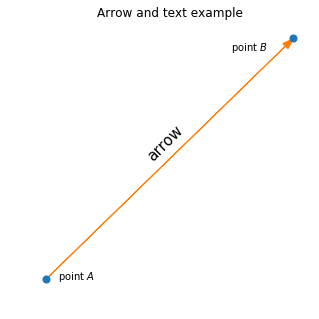

In [15]:
# Create an axes a figure object
f, ax = plt.subplots(1, figsize=(5, 5))

# Scatter the points (0, 0) and (1, 1)
ax.scatter([0, 1], [0, 1], s=50)

# Create an arrow that connects the two
ax.arrow(0, 0, 1, 1, length_includes_head=True, head_width=0.03, color='#ff7f0e', zorder=-1)

# Add three text patches to the plot
ax.text(0.4, 0.6, 'arrow', rotation=45, size=15)
ax.text(0.05, 0, 'point $A$')
ax.text(0.75, 0.95, 'point $B$')

# Add a title to the plot
ax.set_title('Arrow and text example')

# Remove the two axes 
ax.axis('off')

### Styles

There is a number of pre-defined figure styles probided by matplotlib. To select a valid style, you can use:

```python
plt.style.use('style_name')
```

To see a list of available styles type:

```python
print(plt.style.available)
```

###  Final remarks

A nice guide on the advanced features of matplotlib can be found [here](https://python4mpia.github.io/plotting/advanced.html). While we convered most of the stuff in it, there are a few things we left out (like how to change some of matplotlib's default parameters, named [rc parameters](https://python4mpia.github.io/plotting/advanced.html#rc-parameters)).

Finally, you can get lots of ideas for plots in the [matplotlib gallery](https://matplotlib.org/gallery.html).  Each figure is accompanied by the code that produced it. Be sure to check it out!

This tutorial covered the most popular data visualization tools in python. However, making attractive figures has much more to do than just knowing a couple of libraries. While *figure attractiveness* is quite subjective, there are a few steps you could take to make them better looking.

### Tips

![Less is more](http://www.randalolson.com/wp-content/uploads/data-ink.gif)

The most important tips are to rid your figures of [chartjuck](https://en.wikipedia.org/wiki/Chartjunk) (yes, that's actually a term!), remove any **redundant information** (excess lines, borders, labels, etc.) and try to make the colors easier on the eye.

For the last, you should avoid *pure* RGB colors (e.g. $(0, 0, 255)$ for blue), vibrant colors and [very opposite RGB colors](https://upload.wikimedia.org/wikipedia/commons/a/af/RGB_scheme_contrast_of_complementary_colors.svg). Instead try selecting **muted colors**. Matplotlib's [default colors](https://matplotlib.org/users/dflt_style_changes.html#colors-color-cycles-and-color-maps) are an excellent example.

Below is a comparison of three different color schemes: matplotlib's original colors, a more vibrant set of colors and matplotlib's current color scheme. We'll also compare how a red-green colored plot looks compared to a blue-orange one (which is also good for colorblind). 

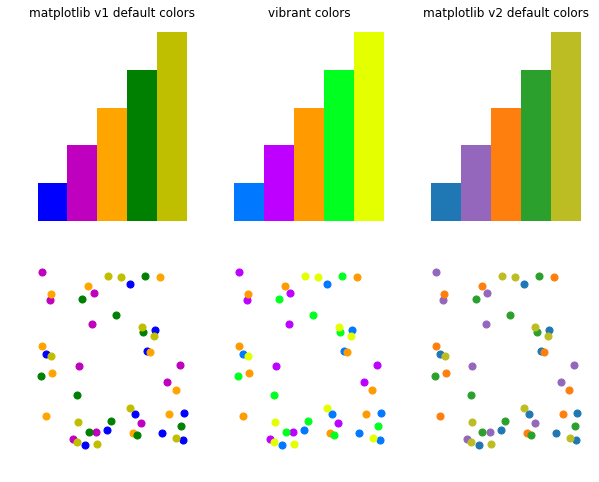

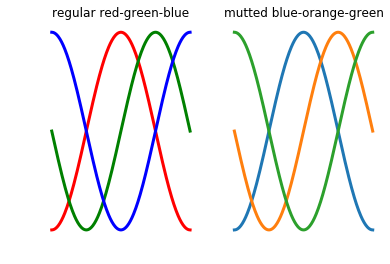

In [16]:
# Regular colors (matplotlib v1 defaults):
rgb_colors = ['b', 'm', 'orange', 'g', 'y']

# Vibrant color scheme:
vibrant_colors = ['#0078ff', '#bd00ff', '#ff9a00', '#01ff1f', '#e3ff00']
# equivalent RGB colors: [(0, 120, 255), (189, 0, 255), (255, 154, 0), (1, 255, 31), (227, 255, 0)]

# Mutted color scheme (matplotlib v2 defaults):
mutted_colors = ['#1f77b4', '#9467bd', '#ff7f0e', '#2ca02c', '#bcbd22']

# Define bins and their heights for the barplots
labels = range(5)
heights = range(1, 6)

# Create a figure which will be used for comparing the different color schemes
plt.figure(figsize=(10, 8))

# First barplot: regular colors
ax = plt.subplot(231)
ax.bar(labels, heights, width=1, color=rgb_colors)
ax.axis('off')
ax.set_title('matplotlib v1 default colors')

# Second barplot: vibrant colors
ax = plt.subplot(232)
ax.bar(labels, heights, width=1, color=vibrant_colors)
ax.axis('off')
ax.set_title('vibrant colors')

# Third barplot: mutted colors
ax = plt.subplot(233)
ax.bar(labels, heights, width=1, color=mutted_colors)
ax.axis('off')
ax.set_title("matplotlib v2 default colors")

# Now, we'll do the same thing with scatterplots

# Create 5 groups of 10 points each in the same range 
x1, x2, x3, x4, x5 = [np.random.random(10) for _ in range(5)]
y1, y2, y3, y4, y5 = [np.random.random(10) for _ in range(5)]
xs = [x1, x2, x3, x4, x5]
ys = [y1, y2, y3, y4, y5]

# First scatterplot: regular colors
ax = plt.subplot(234)
for i in range(5):
    ax.scatter(xs[i], ys[i], c=rgb_colors[i], s=50)
ax.axis('off')

# Second scatterplot: vibrant colors
ax = plt.subplot(235)
for i in range(5):
    ax.scatter(xs[i], ys[i], c=vibrant_colors[i], s=50)
ax.axis('off')

# Third scatterplot: mutted colors
ax = plt.subplot(236)
for i in range(5):
    ax.scatter(xs[i], ys[i], c=mutted_colors[i], s=50)
ax.axis('off')

# Draw the figure so that we can create a new one
plt.show()

# Create a new figure 
plt.figsize=(10, 4)

# First plot: regular colors (matplotlib v1 defaults)
ax = plt.subplot(121)
ax.plot(x, c, color='r', lw=3)
ax.plot(x, s, color='g', lw=3)
ax.plot(x, -c, color='b', lw=3)
ax.set_title('regular red-green-blue')
ax.axis('off')

# First plot: regular colors (matplotlib v2 defaults)
ax = plt.subplot(122)
ax.plot(x, c,  color=mutted_colors[0], lw=3)
ax.plot(x, s,  color=mutted_colors[2], lw=3)
ax.plot(x, -c, color=mutted_colors[3], lw=3)
ax.set_title('mutted blue-orange-green')
ax.axis('off')

print()